# Exploring the Central Limit Theorem

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook from the previous assignment, reproduce the pop1 and pop2 populations and samples. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

In [153]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

### Sampling binomial distributions with different population values
_Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?_

In [154]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000) 
print("Population 1: Mean = {}, Standard deviation = {}".format(np.mean(pop1), np.std(pop1)))
print("Population 2: Mean = {}, Standard deviation = {}".format(np.mean(pop2), np.std(pop2)))

Population 1: Mean = 2.0199, Standard deviation = 1.2740894748800022
Population 2: Mean = 5.0045, Standard deviation = 1.5936372705230006


#### First samples: n = 100

In [155]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
s1_mean, s1_std = np.mean(sample1), np.std(sample1)
s2_mean, s2_std = np.mean(sample2), np.std(sample2)

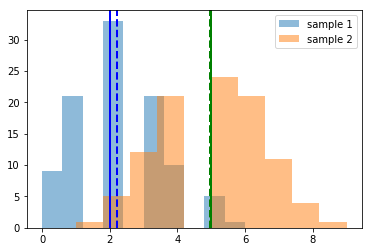

In [156]:
plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.axvline(s1_mean, color='b', linestyle='dashed', linewidth=2)
plt.axvline(s2_mean, color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(pop1), color='b', linestyle='solid', linewidth=2)
plt.axvline(np.mean(pop2), color='g', linestyle='solid', linewidth=2)
plt.show()

In [157]:
print("Sample 1: Mean = {}, Standard deviation = {}".format(s1_mean, s1_std))
print("Sample 2: Mean = {}, Standard deviation = {}".format(s2_mean, s2_std))

Sample 1: Mean = 2.21, Standard deviation = 1.321325092473461
Sample 2: Mean = 4.95, Standard deviation = 1.5708278072405009


#### Second samples: n = 1000

In [158]:
sample3 = np.random.choice(pop1, 1000, replace=True)
sample4 = np.random.choice(pop2, 1000, replace=True)
s3_mean, s3_std = np.mean(sample3), np.std(sample3)
s4_mean, s4_std = np.mean(sample4), np.std(sample4)

I expect the mean and standard deviation to be closer to the population mean and standard deviation because the sample size was increased so the sample should have a lower likelihood of being overly influenced by random outliers. 

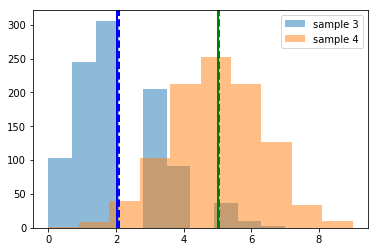

In [159]:
plt.hist(sample3, alpha=0.5, label='sample 3') 
plt.hist(sample4, alpha=0.5, label='sample 4') 
plt.legend(loc='upper right') 
plt.axvline(s3_mean, color='b', linestyle='dashed', linewidth=2)
plt.axvline(s4_mean, color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(pop1), color='b', linestyle='solid', linewidth=2)
plt.axvline(np.mean(pop2), color='g', linestyle='solid', linewidth=2)
plt.show()

In [160]:
print("Sample 3: Mean = {}, Standard deviation = {}".format(s3_mean, s3_std))
print("Sample 4: Mean = {}, Standard deviation = {}".format(s4_mean, s4_std))

Sample 3: Mean = 2.101, Standard deviation = 1.33371623668605
Sample 4: Mean = 5.036, Standard deviation = 1.521415130725339


#### Third samples: n = 20

In [161]:
sample5 = np.random.choice(pop1, 20, replace=True)
sample6 = np.random.choice(pop2, 20, replace=True)
s5_mean, s5_std = np.mean(sample5), np.std(sample5)
s6_mean, s6_std = np.mean(sample6), np.std(sample6)

I expect the mean and standard deviation to vary more from the population than samples 1-4 because the smaller sample size results in any potential random outliers being overly represented in the sample relative to their occurance in the population.

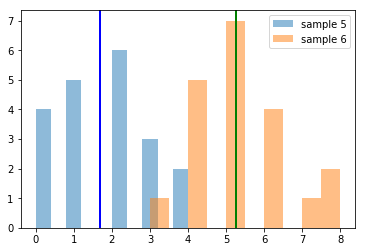

In [162]:
plt.hist(sample5, alpha=0.5, label='sample 5') 
plt.hist(sample6, alpha=0.5, label='sample 6') 
plt.legend(loc='upper right') 
plt.axvline(s5_mean, color='b', linestyle='solid', linewidth=2)
plt.axvline(s6_mean, color='g', linestyle='solid', linewidth=2)
plt.show()

In [163]:
print("Sample 5: Mean = {}, Standard deviation = {}".format(s5_mean, s5_std))
print("Sample 6: Mean = {}, Standard deviation = {}".format(s6_mean, s6_std))

Sample 5: Mean = 1.7, Standard deviation = 1.2288205727444508
Sample 6: Mean = 5.25, Standard deviation = 1.299038105676658


### Changing the population value
_Change the population value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the population value p for group 1 to 0.4, and do it again. What changes, and why?_

In [164]:
pop1 = np.random.binomial(10, 0.3, 10000)
print("Population 1: Mean = {}, Standard deviation = {}".format(np.mean(pop1), np.std(pop1)))
print("Population 2: Mean = {}, Standard deviation = {}".format(np.mean(pop2), np.std(pop2)))

Population 1: Mean = 2.9901, Standard deviation = 1.4473430795771953
Population 2: Mean = 5.0045, Standard deviation = 1.5936372705230006


In [165]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
s1_mean, s1_std = np.mean(sample1), np.std(sample1)
s2_mean, s2_std = np.mean(sample2), np.std(sample2)

In [166]:
print("Sample 1: Mean = {}, Standard deviation = {}".format(s1_mean, s1_std))
print("Sample 2: Mean = {}, Standard deviation = {}".format(s2_mean, s2_std))
# diff_se = (sum(sd ** 2 / size)) ** 0.5  
diff_se = sum(np.array([s1_std, s2_std]) ** 2 / np.array([len(sample1), len(sample2)])) ** 0.5

#The difference between the means divided by the standard error: T-value.  
print((s2_mean - s1_mean) / diff_se)

print("Scipy tvalue: ", scipy.stats.ttest_ind(sample2, sample1, equal_var=False))

Sample 1: Mean = 2.96, Standard deviation = 1.4961283367412037
Sample 2: Mean = 5.1, Standard deviation = 1.4177446878757824
10.3824792846
Scipy tvalue:  Ttest_indResult(statistic=10.330436454167092, pvalue=2.8259619682102166e-20)


In [167]:
# Increase population value again to 0.4
pop1 = np.random.binomial(10, 0.4, 10000)
print("Population 1: Mean = {}, Standard deviation = {}".format(np.mean(pop1), np.std(pop1)))
print("Population 2: Mean = {}, Standard deviation = {}".format(np.mean(pop2), np.std(pop2)))

Population 1: Mean = 4.0315, Standard deviation = 1.550389547823385
Population 2: Mean = 5.0045, Standard deviation = 1.5936372705230006


In [168]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
s1_mean, s1_std = np.mean(sample1), np.std(sample1)
s2_mean, s2_std = np.mean(sample2), np.std(sample2)

In [169]:
print("Sample 1: Mean = {}, Standard deviation = {}".format(s1_mean, s1_std))
print("Sample 2: Mean = {}, Standard deviation = {}".format(s2_mean, s2_std))
# diff_se = (sum(sd ** 2 / size)) ** 0.5  
diff_se = sum(np.array([s1_std, s2_std]) ** 2 / np.array([len(sample1), len(sample2)])) ** 0.5

#The difference between the means divided by the standard error: T-value.  
print((s2_mean - s1_mean) / diff_se)

print("Scipy tvalue: ", scipy.stats.ttest_ind(sample2, sample1, equal_var=False))

Sample 1: Mean = 3.81, Standard deviation = 1.3393655214316966
Sample 2: Mean = 4.9, Standard deviation = 1.5968719422671311
5.2298181566
Scipy tvalue:  Ttest_indResult(statistic=5.2036033641735617, pvalue=4.9918587182565089e-07)


#### Analysis
When increasing the population value from 0.3 to 0.4, the mean and standard deviation of population 1 increased and became closer to the mean and standard deviation of population 2. The t-value likewise decreased from 10.17 to 4.79, while the p value increased. Meanwhile the higher pvalue means that the likelihood that the differenences in sample means is due to underlying actual differences in the underlying populations has decreased. This indicates that the data in sample 1 and sample 2 overlaps more after increasing the population value in the binomial distribution.

### Changing the distribution
_Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?_

In [170]:
pop_new1 = np.random.standard_cauchy(10000)
pop_new2 = np.random.standard_cauchy(10000)
print("Population 1: Mean = {}, Standard deviation = {}".format(np.mean(pop_new1), np.std(pop_new1)))
print("Population 2: Mean = {}, Standard deviation = {}".format(np.mean(pop_new2), np.std(pop_new2)))

Population 1: Mean = -7.791518370341493, Standard deviation = 679.6700864387251
Population 2: Mean = 1.540521713508631, Standard deviation = 99.23601767017793


In [171]:
sample1 = np.random.choice(pop_new1, 100, replace=True)
sample2 = np.random.choice(pop_new2, 100, replace=True)
s1_mean, s1_std = np.mean(sample1), np.std(sample1)
s2_mean, s2_std = np.mean(sample2), np.std(sample2)

In [172]:
print("Sample 1: Mean = {}, Standard deviation = {}".format(s1_mean, s1_std))
print("Sample 2: Mean = {}, Standard deviation = {}".format(s2_mean, s2_std))
# diff_se = (sum(sd ** 2 / size)) ** 0.5  
diff_se = sum(np.array([s1_std, s2_std]) ** 2 / np.array([len(sample1), len(sample2)])) ** 0.5

#The difference between the means divided by the standard error: T-value.  
print((s2_mean - s1_mean) / diff_se)

print("Scipy tvalue: ", scipy.stats.ttest_ind(sample2, sample1, equal_var=False))

Sample 1: Mean = 0.12178187965755953, Standard deviation = 5.844450937546576
Sample 2: Mean = -3.449908757125131, Standard deviation = 19.691919591563032
-1.73881745305
Scipy tvalue:  Ttest_indResult(statistic=-1.7301015212035551, pvalue=0.08626471554045391)


#### Analysis
Both of the random samples do not accurately reflect the population values whatsoever. While the means are not extrmeley far apart in magnitude, they are still very different. Moreover, the standard deviations are sharply different and more specifically, smaller. This reflects the fact that the Cauchy distribution has extreme tails that skew the population distribtion. Taking multiple samples, some of the samples do occasionally give some indication of the huge standard deviation seen in the population.

In [173]:
sample3 = np.random.choice(pop_new1, 100, replace=True)
sample4 = np.random.choice(pop_new2, 100, replace=True)
s3_mean, s3_std = np.mean(sample3), np.std(sample3)
s4_mean, s4_std = np.mean(sample4), np.std(sample4)

print("Sample 1: Mean = {}, Standard deviation = {}".format(s3_mean, s3_std))
print("Sample 2: Mean = {}, Standard deviation = {}".format(s4_mean, s4_std))
# diff_se = (sum(sd ** 2 / size)) ** 0.5  
diff_se = sum(np.array([s3_std, s4_std]) ** 2 / np.array([len(sample3), len(sample4)])) ** 0.5

#The difference between the means divided by the standard error: T-value.  
print((s4_mean - s3_mean) / diff_se)

print("Scipy tvalue: ", scipy.stats.ttest_ind(sample4, sample3, equal_var=False))

Sample 1: Mean = -0.22648021102341154, Standard deviation = 6.678437810709482
Sample 2: Mean = 0.24182448781497506, Standard deviation = 17.878906153142378
0.245371812738
Scipy tvalue:  Ttest_indResult(statistic=0.24414187109435073, pvalue=0.80751773089493195)


In [174]:
# Increasing sample size to 1000
sample3 = np.random.choice(pop_new1, 1000, replace=True)
sample4 = np.random.choice(pop_new2, 1000, replace=True)
s3_mean, s3_std = np.mean(sample3), np.std(sample3)
s4_mean, s4_std = np.mean(sample4), np.std(sample4)

print("Sample 1: Mean = {}, Standard deviation = {}".format(s3_mean, s3_std))
print("Sample 2: Mean = {}, Standard deviation = {}".format(s4_mean, s4_std))
# diff_se = (sum(sd ** 2 / size)) ** 0.5  
diff_se = sum(np.array([s3_std, s4_std]) ** 2 / np.array([len(sample3), len(sample4)])) ** 0.5

#The difference between the means divided by the standard error: T-value.  
print((s4_mean - s3_mean) / diff_se)

print("Scipy tvalue: ", scipy.stats.ttest_ind(sample4, sample3, equal_var=False))

Sample 1: Mean = -1.5716474278365957, Standard deviation = 29.123873830798733
Sample 2: Mean = 3.9956908297367653, Standard deviation = 154.4944610086959
1.11982981769
Scipy tvalue:  Ttest_indResult(statistic=1.1192697627334858, pvalue=0.2632762834400374)
